Подключение диска

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


Подключение TensorFlow и проверка версии

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("Версия TensorFlow:", tf.__version__)

# Проверка доступных устройств GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPU доступен:", gpus)
else:
    print("GPU недоступен для TensorFlow.")
print("Доступные устройства:", tf.config.list_physical_devices('GPU'))
gpus = tf.config.list_physical_devices('GPU')

Num GPUs Available:  0
Версия TensorFlow: 2.17.1
GPU недоступен для TensorFlow.
Доступные устройства: []


Определение наличия проекта в папке на гугл диске

In [3]:
import os
k=os.listdir('/content/gdrive/MyDrive/Projects')
if k=='':
  print('Необходимо загрузить папку проекта на диск')
else:
  k

In [4]:
!pip install jovian --upgrade --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 3.8 MB/s eta 0:00:00


In [5]:
import jovian

In [6]:
! mkdir ~/.kaggle

In [7]:
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [8]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [9]:
! kaggle competitions download student-demographics-online-education-dataoulad

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anlgrbz/student-demographics-online-education-dataoulad")

print("Path to dataset files:", path)

100%|██████████| 42.2M/42.2M [00:01<00:00, 26.8MB/s]


Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/anlgrbz/student-demographics-online-education-dataoulad/versions/1


Распаковка архива, загруженного на диск

In [11]:
import zipfile
import os

zip_path = '/content/gdrive/MyDrive/Projects/SP.zip'
extract_path = '/content/gdrive/MyDrive/Projects/'
req =  '/content/gdrive/MyDrive/Projects/requirements.txt'

folder_path = '/content/drive/My Drive/SP'
zip_file_name = 'SP.zip'
# Распаковка архива
zip_file_path = os.path.join(folder_path, zip_file_name)


if os.path.exists(folder_path) and os.path.exists(req):
    print(f"Файл {zip_file_name} существует.")
else:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        for member in zip_ref.namelist():  # Iterate through files in the archive
            # Check if the file exists in the destination
            if not os.path.exists(os.path.join(extract_path, member)):
                zip_ref.extract(member, extract_path)
                print(f"Файл {member} был распакован.")
            else:
                print(f"Файл {member} уже существует. Пропуск распаковки.")


# Переход в папку проекта
os.chdir(extract_path)

Файл SP/.idea/ уже существует. Пропуск распаковки.
Файл SP/.idea/.gitignore уже существует. Пропуск распаковки.
Файл SP/.idea/inspectionProfiles/ уже существует. Пропуск распаковки.
Файл SP/.idea/inspectionProfiles/profiles_settings.xml уже существует. Пропуск распаковки.
Файл SP/.idea/misc.xml уже существует. Пропуск распаковки.
Файл SP/.idea/modules.xml уже существует. Пропуск распаковки.
Файл SP/.idea/PR.iml уже существует. Пропуск распаковки.
Файл SP/.idea/workspace.xml уже существует. Пропуск распаковки.
Файл SP/app/ уже существует. Пропуск распаковки.
Файл SP/app/desktop/ уже существует. Пропуск распаковки.
Файл SP/app/web/ уже существует. Пропуск распаковки.
Файл SP/data/ уже существует. Пропуск распаковки.
Файл SP/data/external/ уже существует. Пропуск распаковки.
Файл SP/data/processed/ уже существует. Пропуск распаковки.
Файл SP/data/raw/ уже существует. Пропуск распаковки.
Файл SP/data/raw/assessments.csv уже существует. Пропуск распаковки.
Файл SP/data/raw/courses.csv уже с

Установка необходимых библиотек

In [12]:
%%capture
!pip install -r '/content/gdrive/MyDrive/Projects/SP/requirements.txt'


Вывод установленных библиотек

In [13]:
!python -m pip freeze

absl-py==1.4.0
accelerate==1.2.1
aiohappyeyeballs==2.4.4
aiohttp==3.11.10
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.19
albumentations==1.4.20
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.20.0
astropy==6.1.7
astropy-iers-data==0.2024.12.16.0.35.48
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.29.0
bigquery-magics==0.4.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==2.7.1
bokeh==3.6.2
Bottleneck==1.4.2
bqplot==0.12.43
branca==0.8.1
CacheControl==0.14.1
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.12.14
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.0
chex==0.1.88
clarabel==0.9.0
click==8.1.7
cloudpathlib==0.20.0
cloudpickle==3.1.0
cmake==3.31.2
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contourpy=

Импорт необходимых библиотек

In [14]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout
from tensorflow.keras.layers import Dense, Activation, Flatten, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from tensorflow.keras import callbacks
from tensorflow.keras.regularizers import l2

In [15]:
!pip install scikeras

  Using cached scikeras-0.13.0-py3-none-any.whl.metadata (3.1 kB)


In [16]:
from scikeras.wrappers import KerasClassifier

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from typing import Tuple

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

In [19]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import math

Функции

In [20]:
def load_data(file_path: str) -> pd.DataFrame:
    """
    Загружает данные из CSV-файла.

    :param file_path: Путь к файлу.
    :return: DataFrame с загруженными данными.
    """
    return pd.read_csv(file_path)

In [21]:
def preprocess_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Предобработка данных: удаление пропусков, создание новых признаков.

    :param df: Исходный DataFrame.
    :return: DataFrame после предобработки.
    """
    # Удаление строк с пропущенными значениями
    df = df.dropna()

    # Пример создания нового признака
    if 'date_registration' in df.columns and 'date_unregistration' in df.columns:
        df['duration'] = pd.to_datetime(df['date_unregistration']) - pd.to_datetime(df['date_registration'])
        df['duration'] = df['duration'].dt.days

    # Преобразование категориальных признаков в числовые
    df = pd.get_dummies(df, drop_first=True)

    return df

In [22]:
def split_data(df: pd.DataFrame, target: str, test_size: float = 0.2, random_state: int = 42) -> Tuple[pd.DataFrame, pd.DataFrame, pd.Series, pd.Series]:
    """
    Делит данные на обучающую и тестовую выборки.

    :param df: DataFrame с данными.
    :param target: Название столбца с целевой переменной.
    :param test_size: Доля тестовой выборки.
    :param random_state: Случайное зерно для воспроизводимости.
    :return: Кортеж (X_train, X_test, y_train, y_test).
    """
    x = df.drop(columns=[target])
    y = df[target]
    return train_test_split(x, y, test_size=test_size, random_state=random_state)

In [23]:
def train_model(x_train: pd.DataFrame, y_train: pd.Series) -> RandomForestClassifier:
    """
    Обучает модель RandomForestClassifier.

    :param X_train: Обучающая выборка.
    :param y_train: Целевая переменная для обучения.
    :return: Обученная модель.
    """
    model = RandomForestClassifier(random_state=42)
    model.fit(x_train, y_train)
    return model

In [24]:
def save_model(model, file_path: str):
    """
    Сохраняет модель в файл.

    :param model: Обученная модель.
    :param file_path: Путь для сохранения файла.
    """
    joblib.dump(model, file_path)

In [25]:
def load_model(file_path: str):
    """
    Загружает модель из файла.

    :param file_path: Путь к файлу.
    :return: Загруженная модель.
    """
    return joblib.load(file_path)

In [26]:
from sklearn.preprocessing import LabelEncoder
def convert_to_numeric(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    label_encoders = {}
    for column in df.columns:
        if df[column].dtype == 'object':  # Если столбец категориальный/строковый
            unique_values = df[column].nunique()
            if unique_values < 20:  # Если категорий немного, применяем Label Encoding
                le = LabelEncoder()
                df[column] = le.fit_transform(df[column])
                label_encoders[column] = le
            else:
                # Для строковых данных с большим количеством уникальных значений - One-Hot Encoding
                df = pd.get_dummies(df, columns=[column], drop_first=True)

    return df

In [27]:
def check_missing_values(df):
    # Проверяем, передан ли DataFrame
    if not isinstance(df, pd.DataFrame):
        print("Ошибка: переданный объект не является DataFrame.")
        return None

    # Проверяем, пустой ли DataFrame
    if df.empty:
        print("Переданный DataFrame пустой.")
        return None

    # Вычисляем количество пропущенных значений
    missing_values_count = df.isnull().sum()

    # Вычисляем процент пропущенных значений
    total_rows = len(df)
    missing_percentage = (missing_values_count / total_rows) * 100

    # Создаем результирующий DataFrame
    missing_summary = pd.DataFrame({
        'Missing Values': missing_values_count,
        'Percentage (%)': missing_percentage
    })

    # Проверяем, есть ли вообще пропущенные значения
    if missing_values_count.sum() == 0:
        print("Пропущенные значения отсутствуют.")
    else:
        print("Пропущенные значения найдены. Подробности ниже:")
        print(missing_summary)

    # Возвращаем результирующий DataFrame
    return missing_summary

Проверка наличия данных и заагрузка

In [28]:
data_path = '/root/.cache/kagglehub/datasets/anlgrbz/student-demographics-online-education-dataoulad/versions/1'

# Проверяем, существует ли директория
if os.path.exists(data_path):
    # Получаем список файлов в директории
    files = os.listdir(data_path)

    # Проверяем, есть ли файлы в директории
    if files:
        print("Найдены следующие файлы в директории:")
        for file in files:
            print(f"- {file}")
    else:
        print("Директория существует, но файлов в ней нет.")
else:
    print(f"Директория '{data_path}' не существует. Проверьте путь.")

Найдены следующие файлы в директории:
- assessments.csv
- vle.csv
- studentInfo.csv
- courses.csv
- studentAssessment.csv
- studentRegistration.csv
- studentVle.csv


In [29]:
student_info = pd.read_csv("/root/.cache/kagglehub/datasets/anlgrbz/student-demographics-online-education-dataoulad/versions/1/studentInfo.csv")
courses_info = pd.read_csv("/root/.cache/kagglehub/datasets/anlgrbz/student-demographics-online-education-dataoulad/versions/1/courses.csv")
student_assessment = pd.read_csv("/root/.cache/kagglehub/datasets/anlgrbz/student-demographics-online-education-dataoulad/versions/1/studentAssessment.csv")
student_vle = pd.read_csv("/root/.cache/kagglehub/datasets/anlgrbz/student-demographics-online-education-dataoulad/versions/1/studentVle.csv")
assessment = pd.read_csv("/root/.cache/kagglehub/datasets/anlgrbz/student-demographics-online-education-dataoulad/versions/1/assessments.csv")

In [30]:
student_info.head()
student_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [31]:
courses_info.head()
courses_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [32]:
student_assessment.head()
student_assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [33]:
student_vle.head()
student_vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [34]:
assessment.head()
assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [35]:
df_students_assessment = pd.merge(student_info[:5000], student_assessment[:5000], on="id_student", how="inner")
df_students_assessment.head()

code_module code_presentation  id_student gender               region  \
0         AAA             2013J       11391      M  East Anglian Region   
1         AAA             2013J       11391      M  East Anglian Region   
2         AAA             2013J       11391      M  East Anglian Region   
3         AAA             2013J       11391      M  East Anglian Region   
4         AAA             2013J       11391      M  East Anglian Region   

  highest_education imd_band age_band  num_of_prev_attempts  studied_credits  \
0  HE Qualification  90-100%     55<=                     0              240   
1  HE Qualification  90-100%     55<=                     0              240   
2  HE Qualification  90-100%     55<=                     0              240   
3  HE Qualification  90-100%     55<=                     0              240   
4  HE Qualification  90-100%     55<=                     0              240   

  disability final_result  id_assessment  date_submitted  is_banked  score  
0          N         Pass           1752              18          0   78.0  
1          N         Pass           1753              53          0   85.0  
2          N         Pass           1754             115          0   80.0  
3          N         Pass           1755             164          0   85.0  
4          N         Pass           1756             212          0   82.0

In [36]:
df_courses = pd.merge(df_students_assessment, courses_info[:5000], on="code_module", how="inner")
df_courses.head()

code_module code_presentation_x  id_student gender               region  \
0         AAA               2013J       11391      M  East Anglian Region   
1         AAA               2013J       11391      M  East Anglian Region   
2         AAA               2013J       11391      M  East Anglian Region   
3         AAA               2013J       11391      M  East Anglian Region   
4         AAA               2013J       11391      M  East Anglian Region   

  highest_education imd_band age_band  num_of_prev_attempts  studied_credits  \
0  HE Qualification  90-100%     55<=                     0              240   
1  HE Qualification  90-100%     55<=                     0              240   
2  HE Qualification  90-100%     55<=                     0              240   
3  HE Qualification  90-100%     55<=                     0              240   
4  HE Qualification  90-100%     55<=                     0              240   

  disability final_result  id_assessment  date_submitted  is_banked  score  \
0          N         Pass           1752              18          0   78.0   
1          N         Pass           1752              18          0   78.0   
2          N         Pass           1753              53          0   85.0   
3          N         Pass           1753              53          0   85.0   
4          N         Pass           1754             115          0   80.0   

  code_presentation_y  module_presentation_length  
0               2013J                         268  
1               2014J                         269  
2               2013J                         268  
3               2014J                         269  
4               2013J                         268

In [37]:
df = pd.merge(df_courses, student_vle[:5000], on="id_student", how="inner")
df.head()

code_module_x code_presentation_x  id_student gender    region  \
0           AAA               2013J       28400      F  Scotland   
1           AAA               2013J       28400      F  Scotland   
2           AAA               2013J       28400      F  Scotland   
3           AAA               2013J       28400      F  Scotland   
4           AAA               2013J       28400      F  Scotland   

  highest_education imd_band age_band  num_of_prev_attempts  studied_credits  \
0  HE Qualification   20-30%    35-55                     0               60   
1  HE Qualification   20-30%    35-55                     0               60   
2  HE Qualification   20-30%    35-55                     0               60   
3  HE Qualification   20-30%    35-55                     0               60   
4  HE Qualification   20-30%    35-55                     0               60   

   ... date_submitted is_banked  score  code_presentation_y  \
0  ...             22         0   70.0                2013J   
1  ...             22         0   70.0                2013J   
2  ...             22         0   70.0                2013J   
3  ...             22         0   70.0                2013J   
4  ...             22         0   70.0                2013J   

   module_presentation_length  code_module_y code_presentation  id_site date  \
0                         268            AAA             2013J   546652  -10   
1                         268            AAA             2013J   546652  -10   
2                         268            AAA             2013J   546652  -10   
3                         268            AAA             2013J   546614  -10   
4                         268            AAA             2013J   546714  -10   

  sum_click  
0         4  
1         1  
2         1  
3        11  
4         1  

[5 rows x 23 columns]

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52052 entries, 0 to 52051
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   code_module_x               52052 non-null  object 
 1   code_presentation_x         52052 non-null  object 
 2   id_student                  52052 non-null  int64  
 3   gender                      52052 non-null  object 
 4   region                      52052 non-null  object 
 5   highest_education           52052 non-null  object 
 6   imd_band                    48882 non-null  object 
 7   age_band                    52052 non-null  object 
 8   num_of_prev_attempts        52052 non-null  int64  
 9   studied_credits             52052 non-null  int64  
 10  disability                  52052 non-null  object 
 11  final_result                52052 non-null  object 
 12  id_assessment               52052 non-null  int64  
 13  date_submitted              520

In [39]:
df1 = df.copy(deep=True)
print('Копия DataSet выполнена')

Копия DataSet выполнена


In [40]:
print ('dataset: %s'%(str(df.shape)))

dataset: (52052, 23)


In [41]:
all_col=df.columns
all_col

Index(['code_module_x', 'code_presentation_x', 'id_student', 'gender',
       'region', 'highest_education', 'imd_band', 'age_band',
       'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result',
       'id_assessment', 'date_submitted', 'is_banked', 'score',
       'code_presentation_y', 'module_presentation_length', 'code_module_y',
       'code_presentation', 'id_site', 'date', 'sum_click'],
      dtype='object')

In [42]:
cat_col=df.select_dtypes(include=['object']).columns
cat_col

Index(['code_module_x', 'code_presentation_x', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'disability',
       'final_result', 'code_presentation_y', 'code_module_y',
       'code_presentation'],
      dtype='object')

In [43]:
num_col=df.select_dtypes(include=['int64','float64']).columns
num_col

Index(['id_student', 'num_of_prev_attempts', 'studied_credits',
       'id_assessment', 'date_submitted', 'is_banked', 'score',
       'module_presentation_length', 'id_site', 'date', 'sum_click'],
      dtype='object')

In [44]:
missing_data = check_missing_values(df)

Пропущенные значения найдены. Подробности ниже:
                            Missing Values  Percentage (%)
code_module_x                            0        0.000000
code_presentation_x                      0        0.000000
id_student                               0        0.000000
gender                                   0        0.000000
region                                   0        0.000000
highest_education                        0        0.000000
imd_band                              3170        6.090064
age_band                                 0        0.000000
num_of_prev_attempts                     0        0.000000
studied_credits                          0        0.000000
disability                               0        0.000000
final_result                             0        0.000000
id_assessment                            0        0.000000
date_submitted                           0        0.000000
is_banked                                0        0.000000
score   

In [45]:
df['imd_band'].isnull().sum()

3170

In [46]:
df['score'].isnull().sum()

196

In [47]:
df['imd_band'].head()

0    20-30%
1    20-30%
2    20-30%
3    20-30%
4    20-30%
Name: imd_band, dtype: object

In [48]:
from sklearn.impute import SimpleImputer

# Создаем экземпляр SimpleImputer с выбранной стратегией
imputer = SimpleImputer(strategy='most_frequent')

imd_band_values = df['imd_band']

# Проверяем, есть ли столбец 'imd_band' в DataFrame
if 'imd_band' not in df.columns:
    raise ValueError("Столбец 'imd_band' отсутствует в DataFrame.")

if df['imd_band'].isnull().all():
    raise ValueError("Столбец 'imd_band' полностью состоит из пропущенных значений.")


# Проверяем наличие пропущенных значений в столбце
missing_values_before = df['imd_band'].isnull().sum()
print(f"Пропущенные значения до заполнения: {missing_values_before}")

imd_band_values = df['imd_band'].values.reshape(-1, 1)

if imd_band_values.size == 0:
    raise ValueError("Массив для заполнения пустой. Проверьте исходные данные.")

# Выполняем заполнение пропущенных значений
df['imd_band'] = imputer.fit_transform(imd_band_values).ravel()

# Проверяем количество пропущенных значений после заполнения
missing_values_after = df['imd_band'].isnull().sum()
print(f"Пропущенные значения после заполнения: {missing_values_after}")

Пропущенные значения до заполнения: 3170
Пропущенные значения после заполнения: 0


In [49]:
from sklearn.impute import SimpleImputer

# Создаем экземпляр SimpleImputer с выбранной стратегией
imputer = SimpleImputer(strategy='mean')

# Проверяем, есть ли столбец 'score' в DataFrame
if 'score' not in df.columns:
    raise ValueError("Столбец 'score' отсутствует в DataFrame.")

# Преобразуем данные столбца 'ш' в массив NumPy
score_values = df['score'].values.reshape(-1, 1)

# Проверяем наличие пропущенных значений в столбце
missing_values_before = np.isnan(score_values).sum()
print(f"Пропущенные значения до заполнения: {missing_values_before}")

# Выполняем заполнение пропущенных значений
df['score'] = imputer.fit_transform(score_values)

# Проверяем количество пропущенных значений после заполнения
missing_values_after = df['score'].isnull().sum()
print(f"Пропущенные значения после заполнения: {missing_values_after}")

Пропущенные значения до заполнения: 196
Пропущенные значения после заполнения: 0


In [50]:
# Проходим по всем столбцам DataFrame
for column in df.columns:
    print(f"Обработка столбца: '{column}'")

    # Проверяем тип данных столбца
    column_dtype = df[column].dtype
    print(f"Тип данных: {column_dtype}")

    # Проверяем наличие пропущенных значений
    missing_values = df[column].isnull().sum()
    print(f"Количество пропущенных значений: {missing_values}")

    # Если столбец категориальный или содержит строки, выводим уникальные значения
    if column_dtype == 'object' or column_dtype.name == 'category':
        unique_values = df[column].nunique()
        print(f"Количество уникальных значений: {unique_values}")
        print("Примеры уникальных значений:")
        print(df[column].unique()[:5])  # Выводим первые 5 уникальных значений
    else:
        # Для числовых столбцов выводим основные статистики
        print("Основные статистические характеристики:")
        print(df[column].describe())

    # Выводим количество повторений каждого значения
    print("Количество повторений каждого значения:")
    print(df[column].value_counts(dropna=False))
    print("-" * 50)  # Разделитель между столбцами

Обработка столбца: 'code_module_x'
Тип данных: object
Количество пропущенных значений: 0
Количество уникальных значений: 1
Примеры уникальных значений:
['AAA']
Количество повторений каждого значения:
code_module_x
AAA    52052
Name: count, dtype: int64
--------------------------------------------------
Обработка столбца: 'code_presentation_x'
Тип данных: object
Количество пропущенных значений: 0
Количество уникальных значений: 2
Примеры уникальных значений:
['2013J' '2014J']
Количество повторений каждого значения:
code_presentation_x
2013J    47594
2014J     4458
Name: count, dtype: int64
--------------------------------------------------
Обработка столбца: 'id_student'
Тип данных: int64
Количество пропущенных значений: 0
Основные статистические характеристики:
count    5.205200e+04
mean     1.046390e+06
std      9.868444e+05
min      2.840000e+04
25%      2.053500e+05
50%      4.024700e+05
75%      2.080474e+06
max      2.698257e+06
Name: id_student, dtype: float64
Количество повторен

In [51]:
df.describe()

id_student  num_of_prev_attempts  studied_credits  id_assessment  \
count  5.205200e+04          52052.000000     52052.000000   52052.000000   
mean   1.046390e+06              0.085645        76.079690    1754.498156   
std    9.868444e+05              0.279842        37.298992       2.270301   
min    2.840000e+04              0.000000        60.000000    1752.000000   
25%    2.053500e+05              0.000000        60.000000    1753.000000   
50%    4.024700e+05              0.000000        60.000000    1754.000000   
75%    2.080474e+06              0.000000        60.000000    1756.000000   
max    2.698257e+06              1.000000       420.000000    1762.000000   

       date_submitted     is_banked         score  module_presentation_length  \
count    52052.000000  52052.000000  52052.000000                52052.000000   
mean       104.947937      0.046108     72.258485                  268.500000   
std         73.448176      0.209720     12.046804                    0.500005   
min         -1.000000      0.000000      0.000000                  268.000000   
25%         26.000000      0.000000     65.000000                  268.000000   
50%        116.000000      0.000000     75.000000                  268.500000   
75%        166.000000      0.000000     81.000000                  269.000000   
max        234.000000      1.000000     98.000000                  269.000000   

             id_site          date     sum_click  
count   52052.000000  52052.000000  52052.000000  
mean   546747.030546     -9.217552      4.695497  
std       129.196540      0.930842      6.585893  
min    546614.000000    -10.000000      1.000000  
25%    546652.000000    -10.000000      1.000000  
50%    546672.000000    -10.000000      2.000000  
75%    546876.000000     -9.000000      5.000000  
max    547050.000000     -7.000000     64.000000

In [52]:
# Удаляем дубликаты из DataFrame
df = df.drop_duplicates()

# Проверяем DataFrame после удаления дубликатов
print("После удаления дубликатов:")
print(df)

# Удаляем строки с пропущенными значениями
df = df.dropna()

# Проверяем DataFrame после удаления пропущенных значений
print("После удаления пропусков:")
print(df)

После удаления дубликатов:
      code_module_x code_presentation_x  id_student gender  \
0               AAA               2013J       28400      F   
1               AAA               2013J       28400      F   
3               AAA               2013J       28400      F   
4               AAA               2013J       28400      F   
5               AAA               2013J       28400      F   
...             ...                 ...         ...    ...   
52047           AAA               2014J     2576122      M   
52048           AAA               2014J     2576122      M   
52049           AAA               2014J     2576122      M   
52050           AAA               2014J     2576122      M   
52051           AAA               2014J     2576122      M   

                     region      highest_education imd_band age_band  \
0                  Scotland       HE Qualification   20-30%    35-55   
1                  Scotland       HE Qualification   20-30%    35-55   
3           

In [53]:
atype = []
for a in df.age_band:
  if (a == '0-35'):
     atype.append('0')
  elif (a == '0-35'):
     atype.append('1')
  elif (a == '55<='):
     atype.append('2')
  else:
    atype.append('3')
df['age_band'] = atype

In [54]:
df2=df.copy(deep=True)

In [55]:
ftype = []
for f in df.final_result:
  if (f == 'Pass'):
     ftype.append('3')
  elif (f == 'Withdrawn'):
     ftype.append('2')
  elif (f == 'Distinction'):
     ftype.append('1')
  elif (f == 'Fail'):
     ftype.append('0')
  else:
    ftype.append('0')
df['final_result'] = ftype

In [56]:
df.head(20)

code_module_x code_presentation_x  id_student gender    region  \
0            AAA               2013J       28400      F  Scotland   
1            AAA               2013J       28400      F  Scotland   
3            AAA               2013J       28400      F  Scotland   
4            AAA               2013J       28400      F  Scotland   
5            AAA               2013J       28400      F  Scotland   
6            AAA               2013J       28400      F  Scotland   
7            AAA               2013J       28400      F  Scotland   
8            AAA               2013J       28400      F  Scotland   
9            AAA               2013J       28400      F  Scotland   
10           AAA               2013J       28400      F  Scotland   
11           AAA               2013J       28400      F  Scotland   
12           AAA               2013J       28400      F  Scotland   
13           AAA               2013J       28400      F  Scotland   
14           AAA               2013J       28400      F  Scotland   
15           AAA               2013J       28400      F  Scotland   
16           AAA               2013J       28400      F  Scotland   
17           AAA               2013J       28400      F  Scotland   
18           AAA               2013J       28400      F  Scotland   
19           AAA               2013J       28400      F  Scotland   
21           AAA               2013J       28400      F  Scotland   

   highest_education imd_band age_band  num_of_prev_attempts  studied_credits  \
0   HE Qualification   20-30%        3                     0               60   
1   HE Qualification   20-30%        3                     0               60   
3   HE Qualification   20-30%        3                     0               60   
4   HE Qualification   20-30%        3                     0               60   
5   HE Qualification   20-30%        3                     0               60   
6   HE Qualification   20-30%        3                     0               60   
7   HE Qualification   20-30%        3                     0               60   
8   HE Qualification   20-30%        3                     0               60   
9   HE Qualification   20-30%        3                     0               60   
10  HE Qualification   20-30%        3                     0               60   
11  HE Qualification   20-30%        3                     0               60   
12  HE Qualification   20-30%        3                     0               60   
13  HE Qualification   20-30%        3                     0               60   
14  HE Qualification   20-30%        3                     0               60   
15  HE Qualification   20-30%        3                     0               60   
16  HE Qualification   20-30%        3                     0               60   
17  HE Qualification   20-30%        3                     0               60   
18  HE Qualification   20-30%        3                     0               60   
19  HE Qualification   20-30%        3                     0               60   
21  HE Qualification   20-30%        3                     0               60   

    ... date_submitted is_banked  score  code_presentation_y  \
0   ...             22         0   70.0                2013J   
1   ...             22         0   70.0                2013J   
3   ...             22         0   70.0                2013J   
4   ...             22         0   70.0                2013J   
5   ...             22         0   70.0                2013J   
6   ...             22         0   70.0                2013J   
7   ...             22         0   70.0                2013J   
8   ...             22         0   70.0                2013J   
9   ...             22         0   70.0                2013J   
10  ...             22         0   70.0                2013J   
11  ...             22         0   70.0                2013J   
12  ...             22         0   70.0                2013J   
13  ...            

In [57]:
df=convert_to_numeric(df)

In [58]:
df.head(20)


code_module_x  code_presentation_x  id_student  gender  region  \
0               0                    0       28400       0       6   
1               0                    0       28400       0       6   
3               0                    0       28400       0       6   
4               0                    0       28400       0       6   
5               0                    0       28400       0       6   
6               0                    0       28400       0       6   
7               0                    0       28400       0       6   
8               0                    0       28400       0       6   
9               0                    0       28400       0       6   
10              0                    0       28400       0       6   
11              0                    0       28400       0       6   
12              0                    0       28400       0       6   
13              0                    0       28400       0       6   
14              0                    0       28400       0       6   
15              0                    0       28400       0       6   
16              0                    0       28400       0       6   
17              0                    0       28400       0       6   
18              0                    0       28400       0       6   
19              0                    0       28400       0       6   
21              0                    0       28400       0       6   

    highest_education  imd_band  age_band  num_of_prev_attempts  \
0                   1         2         2                     0   
1                   1         2         2                     0   
3                   1         2         2                     0   
4                   1         2         2                     0   
5                   1         2         2                     0   
6                   1         2         2                     0   
7                   1         2         2                     0   
8                   1         2         2                     0   
9                   1         2         2                     0   
10                  1         2         2                     0   
11                  1         2         2                     0   
12                  1         2         2                     0   
13                  1         2         2                     0   
14                  1         2         2                     0   
15                  1         2         2                     0   
16                  1         2         2                     0   
17                  1         2         2                     0   
18                  1         2         2                     0   
19                  1         2         2                     0   
21                  1         2         2                     0   

    studied_credits  ...  date_submitted  is_banked  score  \
0                60  ...              22          0   70.0   
1                60  ...              22          0   70.0   
3                60  ...              22          0   70.0   
4                60  ...              22          0   70.0   
5                60  ...              22          0   70.0   
6                60  ...              22          0   70.0   
7                60  ...              22          0   70.0   
8                60  ...              22          0   70.0   
9                60  ...              22          0   70.0   
10               60  ...              22          0   70.0   
11               60  ...              22          0   70.0   
12               60  ...              22          0   70.0   
13               60  ...              22          0   70.0   
14               60  ...              22          0   70.0   
15               60  ...              22          0   70.0   
16               60  ...              22          0   70.0   
17               60  ...              22          0   70.0   
18       

In [59]:
df.describe()

code_module_x  code_presentation_x    id_student        gender  \
count        50916.0         50916.000000  5.091600e+04  50916.000000   
mean             0.0             0.084689  1.045052e+06      0.607785   
std              0.0             0.278420  9.863061e+05      0.488249   
min              0.0             0.000000  2.840000e+04      0.000000   
25%              0.0             0.000000  2.053500e+05      0.000000   
50%              0.0             0.000000  4.024700e+05      1.000000   
75%              0.0             0.000000  2.080474e+06      1.000000   
max              0.0             1.000000  2.698257e+06      1.000000   

             region  highest_education      imd_band      age_band  \
count  50916.000000       50916.000000  50916.000000  50916.000000   
mean       6.189606           0.866604      5.446657      1.253673   
std        3.743141           0.866340      2.938247      0.911303   
min        0.000000           0.000000      0.000000      0.000000   
25%        3.000000           0.000000      3.000000      0.000000   
50%        7.000000           1.000000      6.000000      2.000000   
75%        9.000000           2.000000      8.000000      2.000000   
max       12.000000           3.000000      9.000000      2.000000   

       num_of_prev_attempts  studied_credits  ...  date_submitted  \
count          50916.000000     50916.000000  ...    50916.000000   
mean               0.084689        75.908948  ...      105.036217   
std                0.278420        37.156528  ...       73.439855   
min                0.000000        60.000000  ...       -1.000000   
25%                0.000000        60.000000  ...       27.000000   
50%                0.000000        60.000000  ...      116.000000   
75%                0.000000        60.000000  ...      166.000000   
max                1.000000       420.000000  ...      234.000000   

          is_banked         score  code_presentation_y  \
count  50916.000000  50916.000000         50916.000000   
mean       0.045644     72.299094             0.500000   
std        0.208713     12.059798             0.500005   
min        0.000000      0.000000             0.000000   
25%        0.000000     65.000000             0.000000   
50%        0.000000     75.000000             0.500000   
75%        0.000000     81.000000             1.000000   
max        1.000000     98.000000             1.000000   

       module_presentation_length  code_module_y  code_presentation  \
count                50916.000000        50916.0            50916.0   
mean                   268.500000            0.0                0.0   
std                      0.500005            0.0                0.0   
min                    268.000000            0.0                0.0   
25%                    268.000000            0.0                0.0   
50%                    268.500000            0.0                0.0   
75%                    269.000000            0.0                0.0   
max                    269.000000            0.0                0.0   

             id_site          date     sum_click  
count   50916.000000  50916.000000  50916.000000  
mean   546748.943593     -9.220756      4.760900  
std       129.703504      0.931670      6.642344  
min    546614.000000    -10.000000      1.000000  
25%    546652.000000    -10.000000      1.000000  
50%    546681.000000    -10.000000      2.000000  
75%    546876.000000     -9.000000      5.000000  
max    547050.000000     -7.000000     64.000000  

[8 rows x 23 columns]

In [60]:
# Импортируем модуль для стандартизации данных
from sklearn.preprocessing import StandardScaler

# Создаем экземпляр класса StandardScaler
scaler = StandardScaler()

# Извлекаем данные столбца 'score' и преобразуем их в нужный формат
score_values = df['score'].values.reshape(-1, 1)

# Применяем стандартизацию к данным
scaled_scores = scaler.fit_transform(score_values)

# Сохраняем стандартизированные данные обратно в DataFrame
df['score'] = scaled_scores

# Печатаем описание нового стандартизированного столбца
print("Описание стандартизированного столбца 'score':")
print(df['score'].describe())

Описание стандартизированного столбца 'score':
count    5.091600e+04
mean     1.429012e-16
std      1.000010e+00
min     -5.995109e+00
25%     -6.052478e-01
50%      2.239617e-01
75%      7.214874e-01
max      2.131143e+00
Name: score, dtype: float64


In [61]:
df.head()

code_module_x  code_presentation_x  id_student  gender  region  \
0              0                    0       28400       0       6   
1              0                    0       28400       0       6   
3              0                    0       28400       0       6   
4              0                    0       28400       0       6   
5              0                    0       28400       0       6   

   highest_education  imd_band  age_band  num_of_prev_attempts  \
0                  1         2         2                     0   
1                  1         2         2                     0   
3                  1         2         2                     0   
4                  1         2         2                     0   
5                  1         2         2                     0   

   studied_credits  ...  date_submitted  is_banked     score  \
0               60  ...              22          0 -0.190643   
1               60  ...              22          0 -0.190643   
3               60  ...              22          0 -0.190643   
4               60  ...              22          0 -0.190643   
5               60  ...              22          0 -0.190643   

   code_presentation_y  module_presentation_length  code_module_y  \
0                    0                         268              0   
1                    0                         268              0   
3                    0                         268              0   
4                    0                         268              0   
5                    0                         268              0   

   code_presentation  id_site  date  sum_click  
0                  0   546652   -10          4  
1                  0   546652   -10          1  
3                  0   546614   -10         11  
4                  0   546714   -10          1  
5                  0   546652   -10          8  

[5 rows x 23 columns]

In [62]:
from sklearn.preprocessing import LabelEncoder
#добавление категорий в датафрейм
encoder = LabelEncoder()
df['imd_band'] = encoder.fit_transform(df['imd_band'])
df.head()

code_module_x  code_presentation_x  id_student  gender  region  \
0              0                    0       28400       0       6   
1              0                    0       28400       0       6   
3              0                    0       28400       0       6   
4              0                    0       28400       0       6   
5              0                    0       28400       0       6   

   highest_education  imd_band  age_band  num_of_prev_attempts  \
0                  1         2         2                     0   
1                  1         2         2                     0   
3                  1         2         2                     0   
4                  1         2         2                     0   
5                  1         2         2                     0   

   studied_credits  ...  date_submitted  is_banked     score  \
0               60  ...              22          0 -0.190643   
1               60  ...              22          0 -0.190643   
3               60  ...              22          0 -0.190643   
4               60  ...              22          0 -0.190643   
5               60  ...              22          0 -0.190643   

   code_presentation_y  module_presentation_length  code_module_y  \
0                    0                         268              0   
1                    0                         268              0   
3                    0                         268              0   
4                    0                         268              0   
5                    0                         268              0   

   code_presentation  id_site  date  sum_click  
0                  0   546652   -10          4  
1                  0   546652   -10          1  
3                  0   546614   -10         11  
4                  0   546714   -10          1  
5                  0   546652   -10          8  

[5 rows x 23 columns]

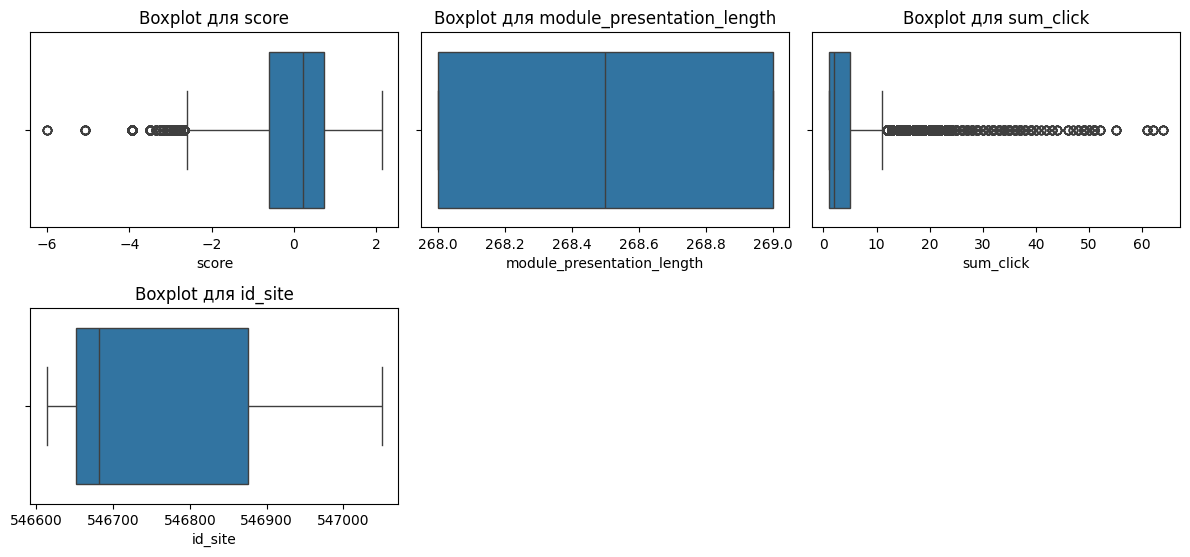

In [63]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df[['score','module_presentation_length', 'sum_click', 'id_site']]):
    plt.subplot(3, 3, i+1)  # Печатаем графики по 3 в ряду
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot для {column}')
    plt.tight_layout()
plt.show()

In [64]:
def detect_outliers_iqr(df: pd.DataFrame, numerical_columns: list) -> pd.DataFrame:
    outliers_list = []  # Список для хранения информации о выбросах

    for column in numerical_columns:
        # Вычисляем Q1, Q3 и IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Определяем границы для выбросов
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Подсчитываем количество выбросов
        outlier_count = len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])

        # Добавляем информацию о выбросах в список
        outliers_list.append({
            "column": column,
            "lower_bound": lower_bound,
            "upper_bound": upper_bound,
            "outlier_count": outlier_count
        })

    # Преобразуем список в DataFrame и возвращаем
    return pd.DataFrame(outliers_list)


# Выбираем только числовые столбцы
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Получаем информацию о выбросах
outliers_info = detect_outliers_iqr(df, numerical_columns)

# Выводим информацию о выбросах
print(outliers_info)

                        column   lower_bound   upper_bound  outlier_count
0                code_module_x  0.000000e+00  0.000000e+00              0
1          code_presentation_x  0.000000e+00  0.000000e+00           4312
2                   id_student -2.607336e+06  4.893160e+06              0
3                       gender -1.500000e+00  2.500000e+00              0
4                       region -6.000000e+00  1.800000e+01              0
5            highest_education -3.000000e+00  5.000000e+00              0
6                     imd_band -4.500000e+00  1.550000e+01              0
7                     age_band -3.000000e+00  5.000000e+00              0
8         num_of_prev_attempts  0.000000e+00  0.000000e+00           4312
9              studied_credits  6.000000e+01  6.000000e+01          11228
10                  disability  0.000000e+00  0.000000e+00           1926
11                final_result  5.000000e-01  4.500000e+00           2616
12               id_assessment  1.7485

In [65]:
from sklearn.preprocessing import MinMaxScaler

numerical_columns = df.select_dtypes(include=[float, int]).columns

# Минимум-Максимум Нормализация
min_max_scaler = MinMaxScaler()
df_min_max = df.copy()
df_min_max[numerical_columns] = min_max_scaler.fit_transform(df[numerical_columns])

# Результат
print("Нормализованные данные (Min-Max):")
print(df_min_max.head())


Нормализованные данные (Min-Max):
   code_module_x  code_presentation_x  id_student  gender  region  \
0            0.0                  0.0         0.0     0.0     0.5   
1            0.0                  0.0         0.0     0.0     0.5   
3            0.0                  0.0         0.0     0.0     0.5   
4            0.0                  0.0         0.0     0.0     0.5   
5            0.0                  0.0         0.0     0.0     0.5   

   highest_education  imd_band  age_band  num_of_prev_attempts  \
0           0.333333  0.222222       1.0                   0.0   
1           0.333333  0.222222       1.0                   0.0   
3           0.333333  0.222222       1.0                   0.0   
4           0.333333  0.222222       1.0                   0.0   
5           0.333333  0.222222       1.0                   0.0   

   studied_credits  ...  date_submitted  is_banked     score  \
0              0.0  ...        0.097872        0.0  0.714286   
1              0.0  ...   

In [66]:
# Выводим уникальные значения для числовых столбцов
numerical_columns = df_min_max.select_dtypes(include=[float, int]).columns

for column in numerical_columns:
    unique_values = df_min_max[column].unique()
    print(f"Столбец: {column}")
    print(f"Количество уникальных чисел: {len(unique_values)}")
    print(f"Пример уникальных значений: {unique_values[:10]}")  # Первые 10 значений
    print("-" * 50)

Столбец: code_module_x
Количество уникальных чисел: 1
Пример уникальных значений: [0.]
--------------------------------------------------
Столбец: code_presentation_x
Количество уникальных чисел: 2
Пример уникальных значений: [0. 1.]
--------------------------------------------------
Столбец: id_student
Количество уникальных чисел: 295
Пример уникальных значений: [0.         0.00120006 0.00167987 0.00361555 0.0063906  0.00645802
 0.01090171 0.01141372 0.01153058 0.012643  ]
--------------------------------------------------
Столбец: gender
Количество уникальных чисел: 2
Пример уникальных значений: [0. 1.]
--------------------------------------------------
Столбец: region
Количество уникальных чисел: 13
Пример уникальных значений: [0.5        0.58333333 0.91666667 0.83333333 0.41666667 0.66666667
 0.         0.16666667 0.75       0.08333333]
--------------------------------------------------
Столбец: highest_education
Количество уникальных чисел: 4
Пример уникальных значений: [0.3333333

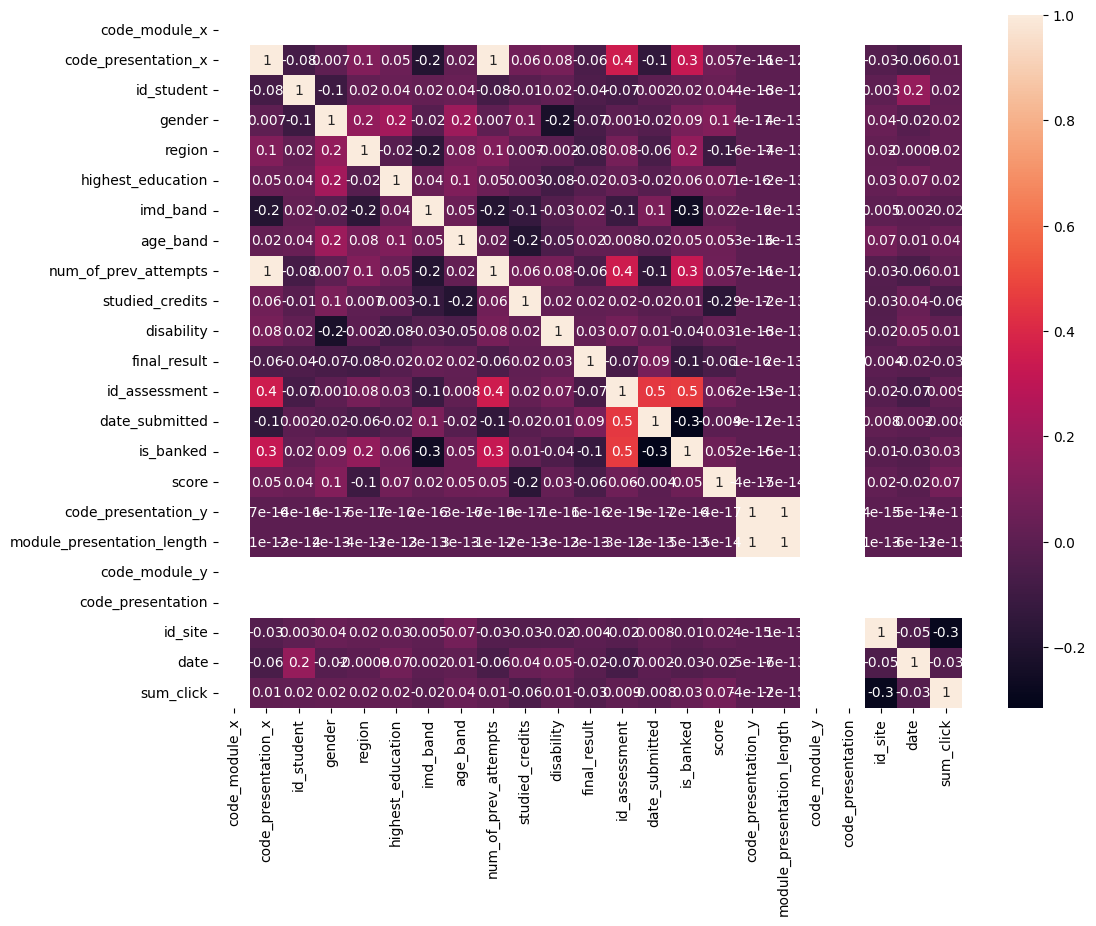

In [67]:
plt.figure(figsize=[12,9])
sns.heatmap(df.corr(),annot=True,fmt='.1g')
plt.show()

<ipython-input-68-a766f190b8ba>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='final_result', palette='viridis')


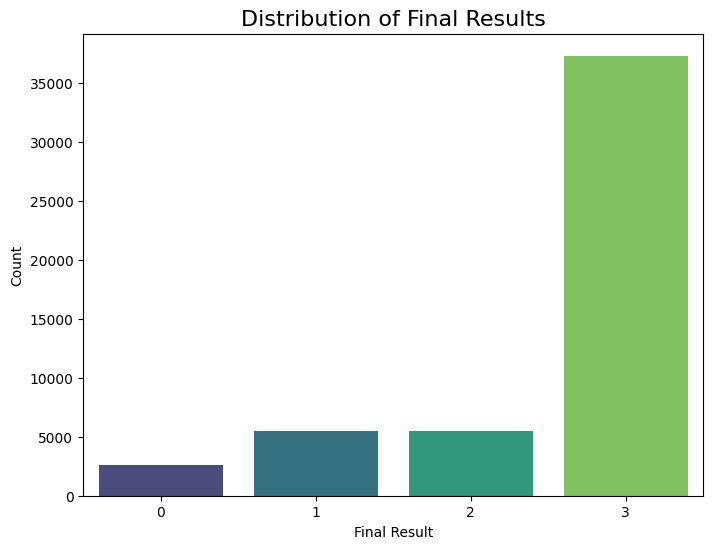

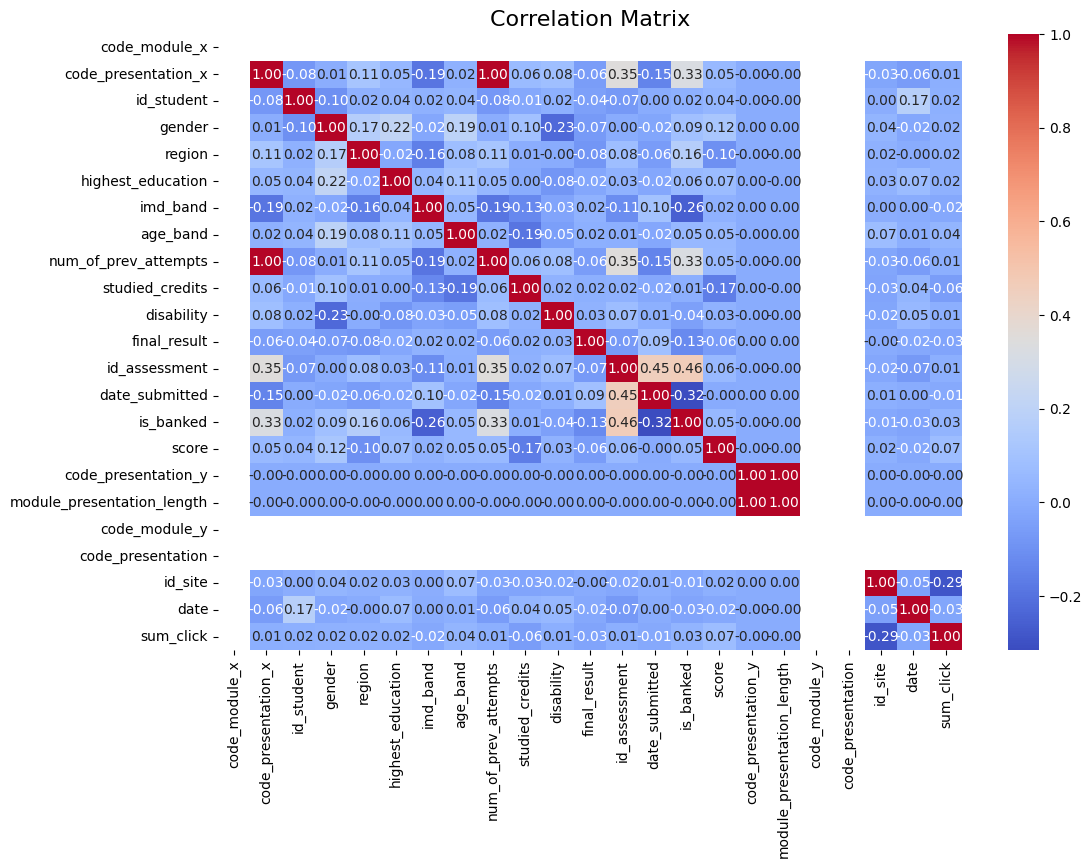

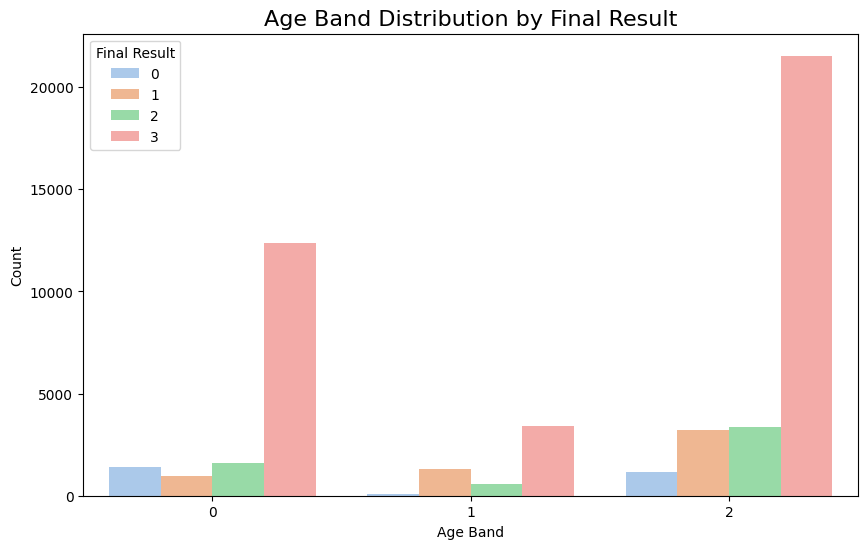

In [68]:
# 1. Распределение целевой переменной (final_result)
data = df.copy()
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='final_result', palette='viridis')
plt.title('Distribution of Final Results', fontsize=16)
plt.xlabel('Final Result')
plt.ylabel('Count')
plt.show()

# 5. Корреляционная матрица для числовых признаков
numerical_data = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
corr_matrix = numerical_data.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

# 6. Распределение возраста студентов (age_band) по результатам
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_band', hue='final_result', palette='pastel')
plt.title('Age Band Distribution by Final Result', fontsize=16)
plt.xlabel('Age Band')
plt.ylabel('Count')
plt.legend(title='Final Result')
plt.show()

In [69]:
df=df.drop(['code_module_y', 'code_presentation','code_module_x','code_presentation_x','code_presentation_y'], axis=1)

Классификация студентов


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [71]:
model = RandomForestClassifier(n_estimators=150, max_depth=20)

In [72]:
#обучение модели
model.fit(df[df.columns[df.columns!='final_result']], df.final_result)

RandomForestClassifier(max_depth=20, n_estimators=150)

In [73]:
df_plot = pd.DataFrame({'features': df.columns[df.columns != 'final_result'],
                        'importances': model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

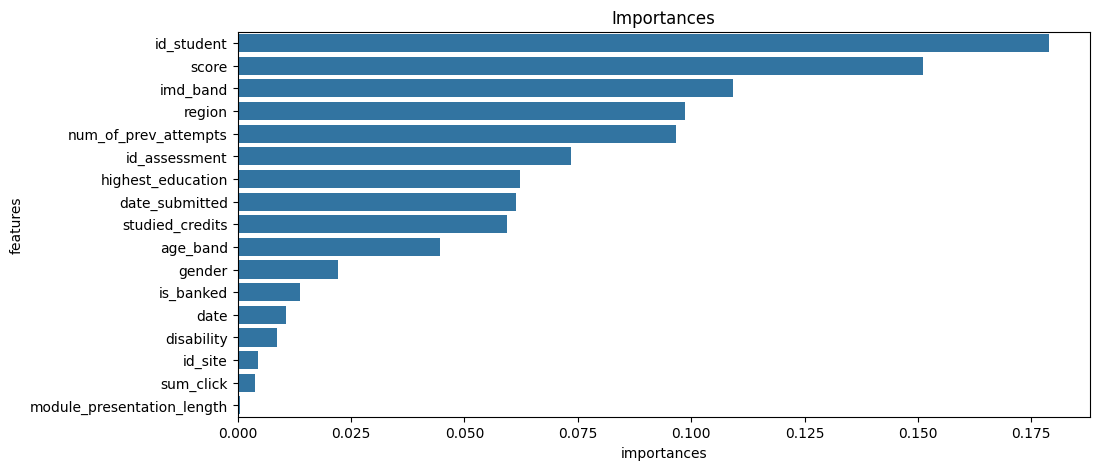

In [74]:
plt.figure(figsize=[11,5])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances')
plt.show()

In [75]:
df = df.drop(df_plot.features[df_plot.importances < 0.04].tolist(), axis=1)

In [76]:
df.columns

Index(['id_student', 'region', 'highest_education', 'imd_band', 'age_band',
       'num_of_prev_attempts', 'studied_credits', 'final_result',
       'id_assessment', 'date_submitted', 'score'],
      dtype='object')

In [77]:
df = df.drop('id_student', axis=1)

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score
import pickle

In [79]:
#Создание списка моделей
classs=[
    KNeighborsClassifier(5),
    SVC(probability=True, kernel='rbf'),
    DecisionTreeClassifier(),
    GaussianNB(),
    LogisticRegression(),
    RandomForestClassifier(),
]

In [80]:
log_col=["Classs","Acc"]
log=pd.DataFrame(columns=log_col)
x = df.drop('final_result', axis=1)
y = df['final_result']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
acc_dict={}

In [81]:
output_dir='/content/gdrive/MyDrive/Projects/SP/models/saved_models'

In [82]:
model_paths = [
    '/content/gdrive/MyDrive/Projects/SP/models/saved_models/KNeighborsClassifier.pkl',
    '/content/gdrive/MyDrive/Projects/SP/models/saved_models/LogisticRegression.pkl',
    '/content/gdrive/MyDrive/Projects/SP/models/saved_models/RandomForestClassifier.pkl',
    '/content/gdrive/MyDrive/Projects/SP/models/saved_models/GaussianNB.pkl',
    '/content/gdrive/MyDrive/Projects/SP/models/saved_models/SVC.pkl',
    '/content/gdrive/MyDrive/Projects/SP/models/saved_models/DecisionTreeClassifier.pkl'
]

In [83]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
metrics_dict = {}
for clf in classs:
    name = clf.__class__.__name__  # Имя класса классификатора
    file_name = os.path.join(output_dir, f"{name}.pkl")  # Путь к файлу для сохранения модели

    # Путь для проверки наличия модели
    model_path = os.path.join(output_dir, f"{name}.pkl")

    # Сохранение или загрузка модели
    if os.path.exists(model_path):
        with open(model_path, 'rb') as file:
            model = pickle.load(file)
            classs[classs.index(clf)] = model
        print(f"Модель '{name}' загружена из файла: {model_path}")
        test_predictions = model.predict(x_test)
        accuracy = accuracy_score(y_test, test_predictions)
        f1 = f1_score(y_test, test_predictions, average='weighted')  # Используется среднее по всем классам
        cm = confusion_matrix(y_test, test_predictions)
        metrics_dict[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'confusion_matrix': cm
        }

        # Вывод метрик
        print(f"Метрики для модели {name}:")
        print(f"  Точность: {accuracy:.4f}")
        print(f"  F1-меры: {f1:.4f}")
        print(f"  Матрица ошибок:\n{cm}\n")
    else:
        print(f"Модель не найдена по пути: {model_path}")
        clf.fit(x_train, y_train)  # Обучение модели
        train_predictions = clf.predict(x_test)  # Прогнозирование на тестовых данных
        acc = accuracy_score(y_test, train_predictions)  # Вычисление точности

        # Обновление словаря с точностями
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

        # Сохранение обученной модели
        with open(file_name, 'wb') as file:
            pickle.dump(clf, file)  # Сохранение самого классификатора (clf)
        print(f"Модель '{name}' сохранена в файл: {file_name}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.4.0 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Модель 'KNeighborsClassifier' загружена из файла: /content/gdrive/MyDrive/Projects/SP/models/saved_models/KNeighborsClassifier.pkl
Метрики для модели KNeighborsClassifier:
  Точность: 0.8812
  F1-меры: 0.8763
  Матрица ошибок:
[[ 239   31   64  176]
 [   0  863   14  216]
 [  18    5  735  325]
 [  47  169  145 7137]]



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.4.0 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Модель 'SVC' загружена из файла: /content/gdrive/MyDrive/Projects/SP/models/saved_models/SVC.pkl
Метрики для модели SVC:
  Точность: 0.7363
  F1-меры: 0.6244
  Матрица ошибок:
[[   0    0    0  510]
 [   0    0    0 1093]
 [   0    0    0 1083]
 [   0    0    0 7498]]



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.0 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Модель 'DecisionTreeClassifier' загружена из файла: /content/gdrive/MyDrive/Projects/SP/models/saved_models/DecisionTreeClassifier.pkl
Метрики для модели DecisionTreeClassifier:
  Точность: 0.8911
  F1-меры: 0.8867
  Матрица ошибок:
[[ 227   45   89  149]
 [   0  788   70  235]
 [  61   13  849  160]
 [  30  144  113 7211]]



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator GaussianNB from version 1.4.0 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Модель 'GaussianNB' загружена из файла: /content/gdrive/MyDrive/Projects/SP/models/saved_models/GaussianNB.pkl
Метрики для модели GaussianNB:
  Точность: 0.6932
  F1-меры: 0.6940
  Матрица ошибок:
[[  35   12   98  365]
 [   0  666   31  396]
 [  28   34  514  507]
 [ 164  942  547 5845]]



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.4.0 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Модель 'LogisticRegression' загружена из файла: /content/gdrive/MyDrive/Projects/SP/models/saved_models/LogisticRegression.pkl
Метрики для модели LogisticRegression:
  Точность: 0.7363
  F1-меры: 0.6244
  Матрица ошибок:
[[   0    0    0  510]
 [   0    0    0 1093]
 [   0    0    0 1083]
 [   0    0    0 7498]]



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.0 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.4.0 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Модель 'RandomForestClassifier' загружена из файла: /content/gdrive/MyDrive/Projects/SP/models/saved_models/RandomForestClassifier.pkl
Метрики для модели RandomForestClassifier:
  Точность: 0.9281
  F1-меры: 0.9233
  Матрица ошибок:
[[ 245    0   31  234]
 [   0  886    0  207]
 [   0    4  923  156]
 [  11   63   26 7398]]



In [84]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
metrics_dict={}
for model, name in zip(classs, model_paths):
    # Прогнозирование на тестовых данных
    test_predictions = model.predict(x_test)  # x_test - тестовые данные

    # Вычисление метрик
    accuracy = accuracy_score(y_test, test_predictions)
    f1 = f1_score(y_test, test_predictions, average='weighted')  # Используется среднее по всем классам
    cm = confusion_matrix(y_test, test_predictions)

    # Сохранение метрик в словарь
    metrics_dict[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'confusion_matrix': cm
    }

    # Вывод метрик
    print(f"Метрики для модели {name}:")
    print(f"  Точность: {accuracy:.4f}")
    print(f"  F1-меры: {f1:.4f}")
    print(f"  Матрица ошибок:\n{cm}\n")

Метрики для модели /content/gdrive/MyDrive/Projects/SP/models/saved_models/KNeighborsClassifier.pkl:
  Точность: 0.8812
  F1-меры: 0.8763
  Матрица ошибок:
[[ 239   31   64  176]
 [   0  863   14  216]
 [  18    5  735  325]
 [  47  169  145 7137]]

Метрики для модели /content/gdrive/MyDrive/Projects/SP/models/saved_models/LogisticRegression.pkl:
  Точность: 0.7363
  F1-меры: 0.6244
  Матрица ошибок:
[[   0    0    0  510]
 [   0    0    0 1093]
 [   0    0    0 1083]
 [   0    0    0 7498]]

Метрики для модели /content/gdrive/MyDrive/Projects/SP/models/saved_models/RandomForestClassifier.pkl:
  Точность: 0.8911
  F1-меры: 0.8867
  Матрица ошибок:
[[ 227   45   89  149]
 [   0  788   70  235]
 [  61   13  849  160]
 [  30  144  113 7211]]

Метрики для модели /content/gdrive/MyDrive/Projects/SP/models/saved_models/GaussianNB.pkl:
  Точность: 0.6932
  F1-меры: 0.6940
  Матрица ошибок:
[[  35   12   98  365]
 [   0  666   31  396]
 [  28   34  514  507]
 [ 164  942  547 5845]]

Метрики дл

In [85]:
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns = log_col)
    log = pd.concat([log,log_entry], ignore_index = True)

<Axes: title={'center': 'Accuracy'}, xlabel='Accuracy'>

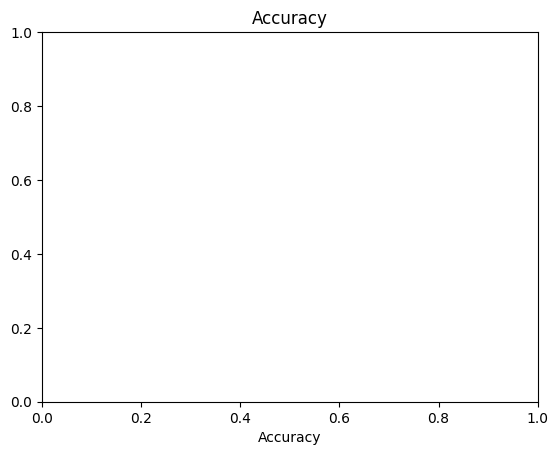

In [86]:
plt.xlabel('Accuracy')
plt.title("Accuracy")
sns.set_color_codes("muted")
sns.barplot(x='Acc',y='Classs', data=log.sort_values(by="Acc"))

Использование методов машинного обучения

In [ ]:
from sklearn.model_selection import GridSearchCV

# Разделение данных на обучающую и тестовую выборки (80% на 20%)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# 1. Decision Tree с настройкой гиперпараметров
dt_params = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_

# 2. Random Forest с настройкой гиперпараметров
rf_params = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
# Обучение и создание моделей для сравнения
models = {
    'Decision Tree (Tuned)': best_dt,
    'Random Forest (Tuned)': best_rf
}


# Настройка графика
plt.figure(figsize=(10, 6))

# Обучение и предсказания для каждой модели
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Обучение модели
    y_pred = model.predict(X_test)  # Прогнозирование на тестовых данных
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    # Формирование имени файла для сохранения
    file_name = os.path.join(output_dir, f"{model_name}.pkl")
    # Сохранение модели
    with open(file_name, 'wb') as file:
        pickle.dump(model, file)
    print(f"Модель '{model_name}' сохранена в файл: {file_name}")

    # 2. Classification Report
    from sklearn.metrics import classification_report
    print(f'Classification Report for {model_name}:\n', classification_report(y_test, y_pred))

In [ ]:
model_name = 'randomforestclassifier'
# Выбор признаков и целевой переменной
X = df.drop('final_result', axis=1)  # Убираем целевой столбец
y = df['final_result']  # Целевая переменная (итоговый результат)

# Преобразование категориальных признаков в числовые
label_encoder = LabelEncoder()
X = X.apply(label_encoder.fit_transform)

# Разделение на обучающие и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Оценка модели
y_pred = rf.predict(X_test)

# Печать классификационного отчета
print(classification_report(y_test, y_pred))

# Визуализация confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Важность признаков
feature_importances = rf.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest')
plt.show()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

y_pred_best = best_rf.predict(X_test)
print("Best Model Classification Report:")
print(classification_report(y_test, y_pred_best))
with open(file_name, 'wb') as file:
    pickle.dump(model, file)
print(f"Модель '{model_name}' сохранена в файл: {file_name}")

In [ ]:
model_path = '/content/gdrive/MyDrive/Projects/SP/models/saved_models/Random Forest (Tuned).pkl'
with open(model_path, 'rb') as file:
    model = pickle.load(file)

test_predictions = model.predict(x_test)

accuracy = accuracy_score(y_test, test_predictions)

# Вывод точности
print(f"Точность модели: {accuracy:.4f}")

Нейронная сеть

In [ ]:
def traintest_f (data, target, model, split=0, scale='linear', **params):
    le = preprocessing.LabelEncoder()
    target_col = le.fit_transform(target)


    # convert integers to dummy variables (i.e. one hot encoded)
    target_col = to_categorical(target_label).astype(float)

    # define 0.01 - 0.1, 0.1 - 0.9, 0.91 - 0.99 sample if split array not defined
    if (split == 0):
        split = np.concatenate((np.linspace(0.01,0.09,9), np.linspace(0.1,0.9,9), np.linspace(0.91,0.99,9)), axis=None)

    print("Parameters")
    print(params)

    print("Split sample:")
    print(split)

    train_scores = []
    test_scores = []

    for s in split:

        print("Running with test size of: %0.2f" % s)

        # get train/test for this split
        d = model_selection.train_test_split(data, target_label,
                                             test_size=s, random_state=0)

        # get training and test data and targets
        train_data, test_data, train_target, test_target = d

        # Data needs to be scaled to a small range like 0 to 1 for the neural network to work well.
        scaler = MinMaxScaler(feature_range=(0, 1))

        # Scale both the training inputs and outputs
        train_data = scaler.fit_transform(train_data)
        test_data = scaler.transform(test_data)

        # Train the model
        model.fit(
            train_data,
            train_target,
            **params,
            validation_data=(test_data, test_target)
        )

        train_error_rate = model.evaluate(train_data, train_target, verbose=0)
        test_error_rate = model.evaluate(test_data, test_target, verbose=0)

        # get test scores for fit and prediction
        train_scores.append(train_error_rate[1])
        test_scores.append(test_error_rate[1])

    # plot results
    plt.figure(figsize=(15.0, 5.0))
    if (scale == 'log'):
        plt.yscale('log')
    else:
        plt.yscale('linear')
    plt.plot(split, train_scores, label='Training accuracy', marker='o')
    plt.plot(split, test_scores, label='Testing accuracy', marker='o')
    plt.title('Training and Testing Accuracy')
    plt.xlabel('Test sample proportion')
    plt.ylabel('Accuracy')
    plt.xticks(np.arange(0, 1.0, 0.1))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlim([min(split),max(split)])
    plt.ylim([0,1.01])
    plt.grid()
    plt.legend()

    return

In [ ]:
def evaluate_model_accuracy(model, data, target_label_1d, **params):
    print("k-Fold Cross Validation")
    print("Parameters")
    print(params)

    kfold = model_selection.StratifiedKFold(n_splits=10, shuffle=True)
    cvscores = []
    for train, test in kfold.split(data, target_label_1d):
        target_label = to_categorical(target_label_1d).astype(float)

        scaler = MinMaxScaler(feature_range=(0, 1))

        # Scale both the training inputs and outputs
        data[train] = scaler.fit_transform(data[train])
        data[test] = scaler.fit_transform(data[test])

        model.fit(data[train], target_label[train], epochs=100, verbose=0)

        scores = model.evaluate(data[test], target_label[test], verbose=0)
        print('{0:} : {1:0.2f}%'.format(model.metrics_names[1], scores[1]*100))
        cvscores.append(scores[1] * 100)
    print('Model Accuracy : {0:0.2f}% (+/- {1:0.2f}%)'.format(np.mean(cvscores), np.std(cvscores)))

    return np.mean(cvscores)

In [ ]:
features_all = ['id_student', 'region', 'highest_education', 'imd_band', 'age_band',
       'num_of_prev_attempts', 'studied_credits', 'final_result',
       'id_assessment', 'date_submitted', 'score']
features_sm = [1, 4, 6, 10]
features = []
for i in features_sm:
    features.append(features_all[i])
features

In [ ]:
print(features_sm)
print(df.columns)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing

In [ ]:
features_sm = [1, 4, 6, 10]
features = [features_all[i] for i in features_sm]
data = df.loc[:, features].astype(float).values
target= df.loc[:, 'final_result'].values

le = preprocessing.LabelEncoder()
target_label_1d = le.fit_transform(target)

data.shape, target.shape, np.unique(target)

In [ ]:
def featuresplot(data, target, features, bclass):
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(features):
        plt.subplot(1, len(features) , i+1)
        plt.hist(data[target == bclass, i], bins=50, color='green', alpha=0.5, label='Pass')
        plt.hist(data[target != bclass, i], bins=50, color='red', alpha=0.5, label='Fail')
        plt.title(col)
        plt.legend()
        plt.tight_layout()
    plt.show()
bclass = 0

In [ ]:
featuresplot(data, target, features, bclass)

In [ ]:
from sklearn import model_selection

In [ ]:
target_label = to_categorical(target_label_1d).astype(float)

In [ ]:
d = model_selection.train_test_split(
    data, target_label, test_size=0.2, random_state=0)
train_data, test_data, train_target, test_target = d
print(train_data.shape, train_target.shape, test_data.shape, test_target.shape)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [ ]:
def baseline_model():
    # Define the model
    model = Sequential()
    model.add(Dense(350, kernel_initializer='uniform', input_dim=4, activation='relu'))
    model.add(Dense(4, kernel_initializer='uniform', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model
model = baseline_model()

In [ ]:
traintest_f(data=data, target=target,model=model)

In [ ]:
RUN_NAME = 'run 6 epoch 800 nodes 350 relu,3 relu, adam'
# Create a TensorBoard logger
logger = keras.callbacks.TensorBoard(
    log_dir='/content/gdrive/MyDrive/Projects/SP/logs{}'.format(RUN_NAME),
    histogram_freq=5,
    write_graph=True)

In [ ]:
model.fit(
    train_data,
    train_target,
    epochs=50,
    shuffle=True,
    verbose=1,
    callbacks=[logger],
    validation_data=(test_data, test_target)
)

In [ ]:
save_dir = '/content/gdrive/MyDrive/Projects/SP/models/saved_models'
os.makedirs(save_dir, exist_ok=True)

# Сохранение модели
model.save(os.path.join(save_dir, 'model1.h5'))

In [ ]:
test_error_rate = model.evaluate(test_data, test_target, verbose=1)
print("The categorical cross-entropy (CCE) for the test data set is: {0:0.4f}".format(test_error_rate[0]))
print("The accuracy of the test data set evaluation is: {0:0.2f}%".format(test_error_rate[1]*100))

In [ ]:
model_acc = evaluate_model_accuracy(model, data, target_label_1d, epochs=10, shuffle=True, verbose=1)

In [ ]:
if not os.path.exists(save_dir):
    os.makedirs(save_dir)  # Создаем директорию, если она не существует

# Укажите имя файла для сохранения модели
model_filename = "model2.h5"

# Полный путь к файлу
save_path = os.path.join(save_dir, model_filename)

# Сохранение модели
model.save(save_path)
print(f'Модель сохранена на дискскск {save_path}.')

In [ ]:
X = df.drop("final_result", axis=1)  # Признаки
y = df["final_result"]               # Целевая переменная

# Разделение данных на тренировочные и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабируем данные
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
df = pd.DataFrame(X_train)  # Если данные в формате NumPy
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
corr_matrix = df.corr()
print(corr_matrix)


In [ ]:
df = df.drop(df.columns[8],axis=1)

In [ ]:
imp = SimpleImputer(strategy='mean')
df1['score'] = imp.fit_transform(df1['score'].values.reshape(-1, 1))
df1['score'].isnull().sum()

imp = SimpleImputer(strategy="most_frequent")
df1['imd_band'] = imp.fit_transform(df1['imd_band'].values.reshape(-1, 1)).ravel()
df1['imd_band'].isnull().sum()

df1 = df1.drop_duplicates().dropna()

In [ ]:
df1.columns

In [ ]:
df1=convert_to_numeric(df1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
df1['score'] = sc_X.fit_transform(df1['score'].values.reshape(-1, 1))
df1['score'].describe()


from sklearn.preprocessing import LabelEncoder
#добавление категорий в датафрейм
encoder = LabelEncoder()
df1['imd_band'] = encoder.fit_transform(df1['imd_band'])

# Пример: нормализация числовых столбцов
numerical_columns = df1.select_dtypes(include=[float, int]).columns

# 1. Минимум-Максимум Нормализация
min_max_scaler = MinMaxScaler()
df1_min_max = df1.copy()
df1_min_max[numerical_columns] = min_max_scaler.fit_transform(df1[numerical_columns])

# Результат
print("Нормализованные данные (Min-Max):")
print(df1_min_max.head())

df1=df1.drop(['code_module_y', 'code_presentation','code_module_x','code_presentation_x','code_presentation_y'], axis=1)

df1=df1.drop(['is_banked', 'date','id_site','module_presentation_length','sum_click'], axis=1)

In [ ]:
df1.columns

In [ ]:
f1type = []
for f in df1.final_result:
  if (f == 'Pass'):
     f1type.append('1')
  elif (f == 'Withdrawn'):
     f1type.append('1')
  elif (f == 'Distinction'):
     f1type.append('0')
  elif (f == 'Fail'):
     f1type.append('0')
  else:
    f1type.append('0')
df1['final_result'] = f1type

In [ ]:
features_all1 = ['id_student', 'region', 'highest_education', 'imd_band', 'age_band',
       'num_of_prev_attempts', 'studied_credits', 'final_result',
       'id_assessment', 'date_submitted', 'score']
features_sm1 = [1, 3, 4, 6, 10]
features1 = []
for i in features_sm1:
    features1.append(features_all1[i])
features1

In [ ]:
features_sm1 = [1, 2, 4, 6, 10]
features1 = [features_all1[i] for i in features_sm1]
data1 = df1.loc[:, features].astype(float).values
target1= df1.loc[:, 'final_result'].values

le = preprocessing.LabelEncoder()
target_label_1d1 = le.fit_transform(target1)

data1.shape, target1.shape, np.unique(target1)

In [ ]:
target_label1 = to_categorical(target_label_1d1).astype(float)

In [ ]:
# split data into training and test dataset
d1 = model_selection.train_test_split(
    data1, target_label1, test_size=0.2, random_state=0)

# get training and test data and targets
train_data1, test_data1, train_target1, test_target1 = d1

print(train_data1.shape, train_target1.shape, test_data1.shape, test_target1.shape)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_data1 = scaler.fit_transform(train_data1)
test_data1 = scaler.transform(test_data1)

In [ ]:
def baseline_model():
    # Define the model
    model = Sequential()
    model.add(Dense(300, activation='relu', input_dim=4, kernel_regularizer=l2(0.01)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
model1 = baseline_model()

In [ ]:
RUN_NAME = 'run 6 epoch 800 nodes 350 relu,3 relu, adam'

# Create a TensorBoard logger
logger = keras.callbacks.TensorBoard(
    log_dir='/Projects/SP/logs/{}'.format(RUN_NAME),
    histogram_freq=5,
    write_graph=True)

In [ ]:
print(test_data1.shape)

In [ ]:
test_error_rate = model1.evaluate(test_data1, test_target1, verbose=1)
print("The categorical cross-entropy (CCE) for the test data set is: {0:0.4f}".format(test_error_rate[0]))
print("The accuracy of the test data set evaluation is: {0:0.2f}%".format(test_error_rate[1]*100))

In [ ]:
model_acc1 = evaluate_model_accuracy(model1, data1, target_label_1d1, epochs=5, shuffle=True, verbose=0)

In [ ]:
if not os.path.exists(save_dir):
    os.makedirs(save_dir)  # Создаем директорию, если она не существует

# Укажите имя файла для сохранения модели
model_filename = "model3.h5"

# Полный путь к файлу
save_path = os.path.join(save_dir, model_filename)

# Сохранение модели
model.save(save_path)
print(f'Модель сохранена на диск {save_path}.')

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(test_data1[:100], label='Тестовые значения', marker='o')
plt.plot(train_data1[:100], label='Предсказанные значения', marker='x')
plt.title('Сравнение тестовых и предсказанных значений')
plt.xlabel('Индекс образца')
plt.ylabel('Значение')
plt.legend()
plt.grid()
plt.show()

In [ ]:
train_target1 = to_categorical(train_target1, num_classes=4)
test_target1 = to_categorical(test_target1, num_classes=4)

print(train_target1.shape)
print(test_target1.shape)

In [ ]:
def improved_model():
    model = Sequential()
    # Первый скрытый слой с Dropout и L2-регуляризацией
    Dense(128, activation='relu', kernel_regularizer=l2(0.02))
    model.add(Dropout(0.3))  # Dropout для предотвращения переобучения
    model.add(BatchNormalization())  # Нормализация для ускорения сходимости

    # Второй скрытый слой
    model.add(Dense(64, kernel_initializer='uniform', activation='relu', kernel_regularizer=l2(0.02)))
    model.add(Dropout(0.3))  # Dropout

    # Выходной слой с softmax для многоклассовой классификации
    model.add(Dense(4, kernel_initializer='uniform', activation='softmax'))

    # Компиляция модели с оптимизатором Adam
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

    return model

# Создание модели
model = improved_model()

# Применение ранней остановки
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Обучение модели
history = model.fit(
    train_data1,
    train_target1,
    epochs=50,
    batch_size=32,
    shuffle=True,
    verbose=1,
    validation_data=(test_data, test_target),
    callbacks=[early_stopping]  # Использование ранней остановки
)

In [ ]:
if not os.path.exists(save_dir):
    os.makedirs(save_dir)  # Создаем директорию, если она не существует

# Укажите имя файла для сохранения модели
model_filename = "model4.h5"

# Полный путь к файлу
save_path = os.path.join(save_dir, model_filename)

# Сохранение модели
model.save(save_path)
print(f'Модель сохранена на диск {save_path}.')

In [ ]:
import numpy as np
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 0 = все сообщения, 1 = фильтруются INFO, 2 = фильтруются WARNING, 3 = фильтруются все, кроме ошибок

# Для подавления конкретного предупреждения
tf.get_logger().setLevel('ERROR')


# Функция для создания модели
def create_model(neurons=10):
    model = Sequential()
    model.add(Dense(neurons, input_dim=4, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compiled = True
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Обертка модели
model = KerasClassifier(model=create_model, verbose=0)

# Сетка параметров
param_grid = {'model__neurons': [5, 10, 20, 50, 100]}

# GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', error_score='raise')

# Поиск
grid_result = grid.fit(data1, target_label_1d1)

# Результаты
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test[:1000], label='Тестовые значения', marker='o')
plt.plot(y_train[:1000], label='Предсказанные значения', marker='x')
plt.title('Сравнение тестовых и предсказанных значений')
plt.xlabel('Индекс образца')
plt.ylabel('Значение')
plt.legend()
plt.grid()
plt.show()

In [ ]:
print(test_data, test_target)

In [ ]:
def improved_model():
    model = Sequential()
    Dense(128, activation='relu')
    model.add(Dropout(0.3))  # Dropout для предотвращения переобучения
    model.add(BatchNormalization())  # Нормализация для ускорения сходимости

    # Второй скрытый слой
    model.add(Dense(350, kernel_initializer='uniform', activation='relu', kernel_regularizer=l2(0.02)))
    model.add(Dropout(0.3))  # Dropout
    model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.01)))
    # Выходной слой с softmax для многоклассовой классификации
    model.add(Dense(4, kernel_initializer='uniform', activation='softmax'))

    # Компиляция модели с оптимизатором Adam
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

    return model

# Создание модели
model = improved_model()

# Применение ранней остановки
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Обучение модели
model_imp = model.fit(
    train_data,
    train_target,
    epochs=50,
    batch_size=64,
    shuffle=True,
    verbose=1,
    validation_data=(test_data, test_target),
    callbacks=[early_stopping]  # Использование ранней остановки
)
save_dir = '/content/gdrive/MyDrive/Projects/SP/models/saved_models'
os.makedirs(save_dir, exist_ok=True)

# Сохранение модели
model.save(os.path.join(save_dir, 'model5.h5'))

In [ ]:
#Загрузка модели
model = load_model('/content/gdrive/MyDrive/Projects/SP/models/saved_models/model5.h5')

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

test_loss, test_accuracy = model.evaluate(test_data, test_target)
print(f'Test Accuracy: {accuracy}')

In [ ]:
def improved_model():
    model = Sequential()

    # Входной слой
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01), input_shape=(train_data.shape[1],)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(4, activation='softmax'))
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Создание модели
model = improved_model()

# Применение обучения с изменением скорости обучения и ранней остановки
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Обучение модели
model_imp = model.fit(
    train_data,
    train_target,
    epochs=50,
    batch_size=32,
    validation_data=(test_data, test_target),
    callbacks=[lr_scheduler, early_stopping]
)
save_dir = '/content/gdrive/MyDrive/Projects/SP/models/saved_models'
os.makedirs(save_dir, exist_ok=True)

# Сохранение модели
model.save(os.path.join(save_dir, 'model6.h5'))

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data, test_target)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

In [ ]:
#Загрузка модели
model = load_model('/content/gdrive/MyDrive/Projects/SP/models/saved_models/model6.h5')

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

test_loss, test_accuracy = model.evaluate(test_data, test_target)
print(f'Test Accuracy: {accuracy}')

In [ ]:
import numpy as np
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

tf.get_logger().setLevel('ERROR')


# Функция для создания модели
def create_model(neurons=10):
    model = Sequential()
    model.add(Dense(neurons, input_dim=4, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compiled = True
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_model, verbose=0)

param_grid = {'model__neurons': [5, 10, 20, 50, 100]}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', error_score='raise')

grid_result = grid.fit(data1, target_label_1d1)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
ftype = []
for f in df.final_result:
  if (f == 'Pass'):
     ftype.append('0')
  elif (f == 'Withdrawn'):
     ftype.append('0')
  elif (f == 'Distinction'):
     ftype.append('1')
  elif (f == 'Fail'):
     ftype.append('1')
  else:
    ftype.append('1')
df['final_result'] = ftype

scaler = StandardScaler()
score_values = df2['score'].values.reshape(-1, 1)
scaled_scores = scaler.fit_transform(score_values)
df2['score'] = scaled_scores

df2=df2.convert_to_numeric(df2)

encoder = LabelEncoder()
df2['imd_band'] = encoder.fit_transform(df2['imd_band'])

numerical_columns = df2.select_dtypes(include=[np.number]).columns

outliers_info = detect_outliers_iqr(df2, numerical_columns)

print(outliers_info)

numerical_columns = df.select_dtypes(include=[float, int]).columns

min_max_scaler = MinMaxScaler()
df_min_max = df.copy()
df_min_max[numerical_columns] = min_max_scaler.fit_transform(df[numerical_columns])


In [ ]:
features = [features_all[i] for i in features_sm]
data = df2.loc[:, features].astype(float).values
target = df2.loc[:, 'final_result'].values

le = preprocessing.LabelEncoder()
target_label_1d = le.fit_transform(target)

data.shape, target.shape, np.unique(target)

In [ ]:
d2 = model_selection.train_test_split(
    data, target_label, test_size=0.2, random_state=0)
train_data, test_data, train_target, test_target = d2
print(train_data.shape, train_target.shape, test_data.shape, test_target.shape)

In [ ]:
def create_binary_model(input_dim):
    model = Sequential()
    model.add(Dense(350, input_dim=input_dim, activation='relu', kernel_initializer='uniform'))
    model.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model
input_dim = 4  # Количество признаков
model = create_binary_model(input_dim)
model.fit(X_train, y_train, epochs=50, batch_size=32)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}"

In [ ]:
save_dir = '/content/gdrive/MyDrive/Projects/SP/models/saved_models'
os.makedirs(save_dir, exist_ok=True)

# Сохранение модели
model.save(os.path.join(save_dir, 'model7.h5'))

In [ ]:
#Загрузка модели
model = load_model('/content/gdrive/MyDrive/Projects/SP/models/saved_models/model7.h5')

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

test_loss, test_accuracy = model.evaluate(test_data, test_target)
print(f'Test Accuracy: {accuracy}')